In [1]:
import numpy as np
import scipy.stats as st
from scipy.special import erf
from scipy.interpolate import interp1d


In [2]:
from numpy.random import default_rng
rng = default_rng()


In [3]:
import matplotlib.pyplot as plt

In [18]:
def sample_cdf(N, cdf, use_scipy=True, dens_interval=(-5,5)):
    if use_scipy==True:
        rvc = st.rv_continuous()
        rvc._cdf = cdf
        return rvc.rvs(size=N)
    else:
        r = np.linspace(*dens_interval, 100000)
        icdf = interp1d(cdf(r),r)
        return icdf(rng.random(N))




In [10]:
smpl1 = sample_cdf(N=10000, cdf=lambda x : erf(x)/2+0.5)


In [21]:
smpl2 = sample_cdf(N=1000000, cdf=lambda x : erf(x)/2+0.5, use_scipy=False)


<BarContainer object of 1000 artists>

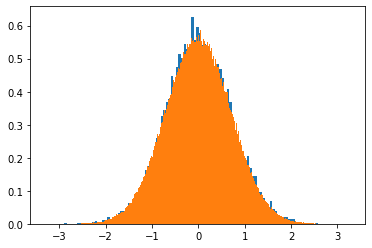

In [24]:
plt.hist(smpl1, bins=100, density=True)[-1]
plt.hist(smpl2, bins=1000, density=True)[-1]

In [8]:
%timeit rng.random(10000)

28.5 µs ± 307 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit np.random.random(10000)

51.9 µs ± 392 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
